In [14]:
from IPython.core.display import HTML
def css_styling():
    sheet = '../css/custom.css'
    styles = open(sheet, "r").read() 
    return HTML(styles)
css_styling()

# Tuples and Dictionaries Exercise

In [16]:
import matplotlib.pyplot as plt
import requests
%matplotlib inline

The purpose of the exersise is to obtain and plot the current weather of a number of European cities. The data is downloaded from Openweather using the given function *read_weather*.

The function returns a list of Dictionaries with each city taking a possition in set list. 
Within the dictionary the name of the cities is given and the weather parameters are also given as a dictionary in the main possition. Before you start the exersise print *Data* and familiarise yourself with the content.


In [41]:
def read_weather():
    url = 'http://api.openweathermap.org/data/2.5/group?id='
    url2 = '&units=metric &APPID=d19cb80543b71c88513d48a5b8d1a29d'
    r = requests.get(url+'524901,2637487,2950159,703448,2643743,264373'+url2)
    Dict = r.json()['list']
    return Dict

In [42]:
Data = read_weather()

### Part 1: Temperature

1. Create two lists that contain the contain the names ('name') and temperature ('temp') of the cities respectively.
2. Convert the list containing the names to a tuple.
3. Plot the temperature of the cities on a two dimensiona graph.
    Hint: (Remember to change the ticks of the x axis to that of the city names)

In [63]:
#### 
names = []
temp = []
for i in Data: 
    D = i
    names.append(D['name'])
    temp.append(D['main']['temp'])

In [46]:
names = tuple(names)

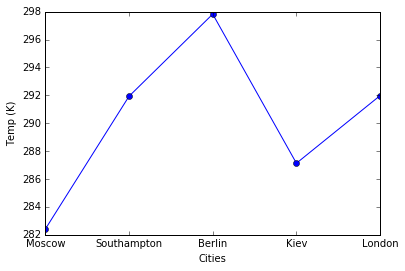

In [62]:
fig = plt.figure()
x = range(len(names))
plt.xticks(x,names)
plt.plot(x,temp,'o-')
plt.xlabel('Cities')
plt.ylabel('Temp (K)')
plt.show()

### Part 2: Weather
Temperature is not the only parameter in the data. By using the code you wrote above obtain and plot all the variables 
1. Identify the rest of the parameters in the *'main'* part of the dictionary. Extract and convert them in to a tuple using the keys attribute.
2. Create a plotting function which:
    * takes the names of the cities, the value of the parameter that is being plotted and the name of that variable to be plotted.
    * Plots the variable against the city name with the equivalent variable name in the
3. Create another function that:
    * Takes in the names of the cities, the variable that is to be plotted and the *Data* list. 
    * Loops over all cities, extracts the value of the variable and  appends it to a list
    * Calls the plotting function with the equivalent inputs 
    
4. Loop over the variables that you extracted from the dictionary keys calling the function you built in part 3 with the required inputs

In [64]:
Data[0]['main']

{'humidity': 93,
 'pressure': 1008,
 'temp': 282.41,
 'temp_max': 284.26,
 'temp_min': 280.15}

In [65]:
variables = tuple(Data[0]['main'].keys())

In [66]:
def plot(names,y,variable):
    fig = plt.figure()
    x = range(len(names))
    plt.xticks(x,names)
    plt.plot(x,y,'o-')
    plt.xlabel('Cities')
    plt.ylabel(variable)
    plt.show()
    return None

In [67]:
def find_plot(names,variable,Data):
    y = []
    for i in Data: 
        D = i
        y.append(D['main'][variable])
    plot(names,y,variable)
    return None

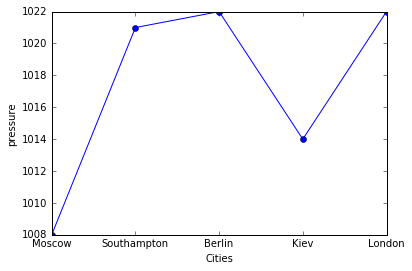

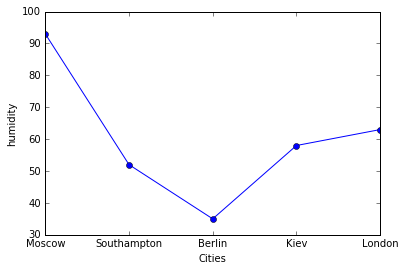

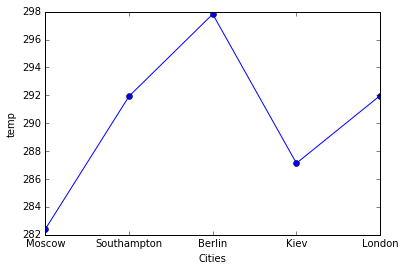

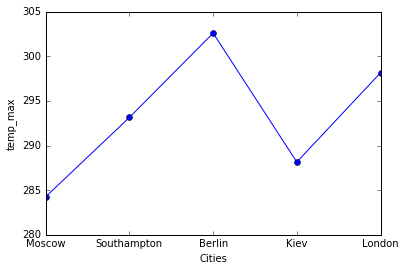

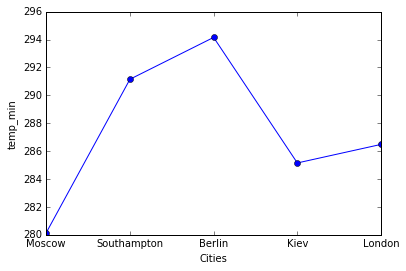

In [68]:
for variable in variables:
    find_plot(names,variable,Data)